<a href="https://colab.research.google.com/github/vicky-nike/Yolo/blob/master/Yolo%20Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import HTML
from subprocess import getoutput
s = getoutput('nvidia-smi')
if 'K80' in s:
  gpu = 'K80'
elif 'T4' in s:
  gpu = 'T4'
elif 'P100' in s:
  gpu = 'P100'
display(HTML(f"<h2>{gpu}</h2>"))
print(s)
# or simply
!nvidia-smi -L

Sat Jun 13 11:38:32 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/'My Drive'/Yolo/darknet

/content/drive/My Drive/Yolo/darknet


In [0]:
ls

 3rdparty/                       image_yolov3.sh*
 backup/                         include/
 bad.list                        json_mjpeg_streams.sh*
 build/                          LICENSE
 build.ps1                       Makefile
 build.sh*                       net_cam_v3.sh*
 cfg/                            obj/
 chart.png                       predictions.jpg
 chart_yolov3_custom_train.png   README.md
 cmake/                          results/
 CMakeLists.txt                  scripts/
 darknet                         src/
 darknet53.conv.74               video_v2.sh*
 DarknetConfig.cmake.in          video_yolov3.sh*
 darknet.py                     'yolov3 (1).weights'
 darknet_video.py                yolov3_custom_train_1000.weights
 data/                           yolov3_custom_train_600.weights
 image_yolov2.sh*                yolov3.weights


In [0]:
#change makefile to have GPU and opencv enabled
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [0]:
#verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [0]:
#make darknet (build)
!make
#building darknet with the makefile that we made so that we can config the darknet for GPU and opencv

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb_

In [0]:
def imshow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image, (3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

def upload():
  from google.colab import files
  uploaded =files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print('saved file', name)

def download(path):
  from google.colab import files
  files.download(path)

In [0]:
#Run darknet detection on image

!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

In [0]:
#Run darknet detection on video
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show data/Mumbai.mp4 -i 0 -out_filename data/out.avi

Streaming output truncated to the last 5000 lines.
FPS:50.8 	 AVG_FPS:49.5

 cvWriteFrame 
Objects:

person: 96% 
person: 91% 
person: 88% 
person: 86% 
person: 49% 
person: 29% 

FPS:49.9 	 AVG_FPS:49.5

 cvWriteFrame 
Objects:

cow: 62% 
person: 98% 
person: 97% 
person: 81% 
person: 72% 
person: 67% 
person: 46% 

FPS:49.8 	 AVG_FPS:49.5

 cvWriteFrame 
Objects:

cow: 79% 
person: 96% 
person: 90% 
person: 77% 
person: 76% 
person: 65% 
person: 47% 

FPS:49.9 	 AVG_FPS:49.5

 cvWriteFrame 
Objects:

cow: 78% 
person: 93% 
person: 91% 
person: 89% 
person: 81% 
person: 66% 

FPS:49.9 	 AVG_FPS:49.5

 cvWriteFrame 
Objects:

cow: 59% 
person: 93% 
person: 91% 
person: 68% 
person: 39% 
person: 34% 
person: 29% 

FPS:50.0 	 AVG_FPS:49.5

 cvWriteFrame 
Objects:

cow: 41% 
person: 96% 
person: 87% 
person: 84% 
person: 37% 
person: 34% 

FPS:50.1 	 AVG_FPS:49.5

 cvWriteFrame 
Objects:

cow: 26% 
person: 87% 
person: 84% 
person: 69% 
person: 64% 
person: 29% 
person: 27% 

FPS:50.3 	 A

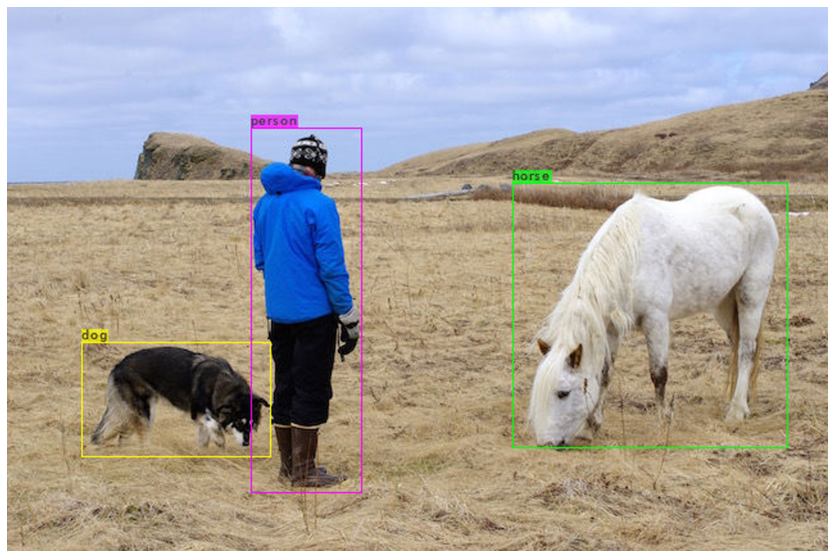

In [0]:
imshow('predictions.jpg')

In [0]:
# If we stay idle for 30 mins the google colab will kick us out, so to avoid that this function will create click every 10mins virtually.
# Press crtl+shift+i and go to console tab and paste this code

function ClickConnect(){
    console.log("Working");
    document.querySelector("colab-toolbar-button#connect").click()
}
setInterval(ClickConnect, 60000)

In [0]:
imshow('chart.png')